# COM56000 Deep Learning  -  Homework 1
## Machine Learning Basics: Regression and Classification
## 荷西 Pablo López
**Student ID:** 107065431

**Note**: For the elaboration of this report, I have decided to include everything in a Jupyter notebook, in order to improve readability of the code and provide insightful comments of the most important sections.
If you have any question please feel free to email me: pabloldieguez@gmail.com <br> Thank you for your time.

First of all, I have imported the allowed packages that we would use along the project:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In the next section, I have imported the data from the **train.csv** file into the newly created **whole** dataframe.

# 1) Linear Regression a)

In [2]:
# Read the whole dataset train.csv
whole = pd.read_csv("train.csv")
print(whole[0:3])
len(whole)
#list(whole)

   ID school sex  age address famsize Pstatus  Medu  Fedu      Mjob ...   \
0   1     GP   M   16       U     GT3       T     1     0     other ...    
1   2     MS   M   17       R     GT3       T     2     2     other ...    
2   3     GP   F   17       U     GT3       T     3     3  services ...    

  freetime goout Dalc  Walc  health  absences  G1  G2  G3  cat  
0        3     2    1     1       3         0  16  17  18  por  
1        5     5    3     5       5         0   8  13  10  por  
2        2     2    2     3       5        10  11  11  11  por  

[3 rows x 35 columns]


1000

Since most of the features contain several possibilities, I wanted to break down those features and include them separately:

In [3]:
whole = pd.get_dummies(whole)
print(whole[0:3])

   ID  age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0   1   16     1     0           2          2         0       4         3   
1   2   17     2     2           2          1         0       5         5   
2   3   17     3     3           2          3         0       4         2   

   goout   ...     nursery_no  nursery_yes  higher_no  higher_yes  \
0      2   ...              0            1          0           1   
1      5   ...              0            1          1           0   
2      2   ...              0            1          0           1   

   internet_no  internet_yes  romantic_no  romantic_yes  cat_mat  cat_por  
0            0             1            0             1        0        1  
1            1             0            0             1        0        1  
2            0             1            0             1        0        1  

[3 rows x 62 columns]


In [4]:
# Now we can see all the new list of paramenters of the dataset
list(whole)

['ID',
 'age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3',
 'school_GP',
 'school_MS',
 'sex_F',
 'sex_M',
 'address_R',
 'address_U',
 'famsize_GT3',
 'famsize_LE3',
 'Pstatus_A',
 'Pstatus_T',
 'Mjob_at_home',
 'Mjob_health',
 'Mjob_other',
 'Mjob_services',
 'Mjob_teacher',
 'Fjob_at_home',
 'Fjob_health',
 'Fjob_other',
 'Fjob_services',
 'Fjob_teacher',
 'reason_course',
 'reason_home',
 'reason_other',
 'reason_reputation',
 'guardian_father',
 'guardian_mother',
 'guardian_other',
 'schoolsup_no',
 'schoolsup_yes',
 'famsup_no',
 'famsup_yes',
 'paid_no',
 'paid_yes',
 'activities_no',
 'activities_yes',
 'nursery_no',
 'nursery_yes',
 'higher_no',
 'higher_yes',
 'internet_no',
 'internet_yes',
 'romantic_no',
 'romantic_yes',
 'cat_mat',
 'cat_por']

Normalization will be done after I separate the data into **training** and **testing** according to the next formula:

In [5]:
# --------------------------------------------------------------------------------------------------------
# --------------------------------------------------------------------------------------------------------
# ------------------------------- NORMALIZE --------------------------------------------------------------
# -------------- THE COLUMNS THAT CONTAIN NON-BINARY NUMERICAL VALUES ------------------------------------

#                                X - mean(X)               
#                            X = -------------
#                                    std(X)

# other possibility for normalization is X = (Xi - min(x))/(max(x)-min(x))

# Now that our 'whole' dataframe has quantized categories, we can normalize each column with the above formula
#whole = ((whole-whole.min())/(whole.max()-whole.min()))
print(whole[0:5])

   ID  age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0   1   16     1     0           2          2         0       4         3   
1   2   17     2     2           2          1         0       5         5   
2   3   17     3     3           2          3         0       4         2   
3   4   16     4     3           1          2         0       3         4   
4   5   15     4     3           1          2         0       4         5   

   goout   ...     nursery_no  nursery_yes  higher_no  higher_yes  \
0      2   ...              0            1          0           1   
1      5   ...              0            1          1           0   
2      2   ...              0            1          0           1   
3      3   ...              0            1          0           1   
4      2   ...              0            1          0           1   

   internet_no  internet_yes  romantic_no  romantic_yes  cat_mat  cat_por  
0            0             1            0     

***OBTAIN TRAINING AND TEST SETS***
<br> In order to split the data into **Training** and **Test**, we take a random sample which contains 80% of the previously built dataframe (called *whole*) and we set it to be the training set. This training set will be normalized and used to obtain the weights in the different models that will be build along this report.
<br> On the other hand, the remaining 20% of the random sample will be the test set, and will be used to evaluate and validate the different models.

In [6]:
# build train dataframe with 80% of the dataset 
train_df = whole.sample(frac=0.8,random_state=200)

# the remaining 20% builds test dataframe
test_df = whole.drop(train_df.index)

In [7]:
# check length
len(train_df) # 800
#len(test_df)  # 200

800

In [8]:
#train_df = train_df.drop(columns='G3') #remove G3 column that we want to predict NONONO
train_df.head()
train_df.columns[16:17]

Index(['G3'], dtype='object')

In the next section, I removed all the redundant features and only left the necessary ones for correct training/prediction. Afterwards, the **training dataframe** was normalized according to the previously mentioned formula.

In [9]:
# X matrix includes only the indicated features (columns)
# X = train_df.drop('G3', axis=1)
# The columns with several options may not be linearly dependent, therefore I decided to include every option

X = train_df.loc[:, train_df.columns.intersection([
 'school_GP',
 'school_MS',
 'sex_F',
 'sex_M',
 'age',
 'famsize_GT3',
 'famsize_LE3',                                            
 'studytime',
 'failures',
 'activities_no',
 #'activities_yes', ------- redundant
 'higher_no',
 #'higher_yes', ----------- redundant
 'internet_no',
 #'internet_yes', --------- redundant
 'romantic_no',
 #'romantic_yes', --------- redundant
 'famrel',                                                  
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences'])]
X = ((X-X.min())/(X.max()-X.min())) #normalization
print(X[0:3])

          age  studytime  failures  famrel  freetime  goout  Dalc  Walc  \
674  0.285714   0.000000  0.000000    0.75       1.0   0.50  0.00   0.0   
233  0.428571   0.333333  0.333333    0.00       0.0   0.00  0.00   0.0   
739  0.142857   0.000000  0.000000    0.50       0.5   0.25  0.25   0.0   

     health  absences  school_GP  school_MS  sex_F  sex_M  famsize_GT3  \
674     1.0  0.074074        0.0        1.0    1.0    0.0          1.0   
233     1.0  0.000000        0.0        1.0    1.0    0.0          1.0   
739     1.0  0.000000        1.0        0.0    0.0    1.0          1.0   

     famsize_LE3  activities_no  higher_no  internet_no  romantic_no  
674          0.0            0.0        1.0          1.0          1.0  
233          0.0            0.0        0.0          1.0          1.0  
739          0.0            1.0        1.0          0.0          0.0  


In [10]:
# In case we wanted to include the bias term:
#ones = np.ones([X.shape[0],1])
#len(ones[0])
#X = np.concatenate((ones,X),axis=1)
# ---------------------------------------------------------
X = X.values # Convert from pandas dataframe to numpy array
XT = X.T
len(X[0])

20

**X dataframe** is for training. <br> Now **y dataframe** corresponds with the real values of G3 features (the one we seek to predict). It is not normalized.

In [11]:
y = train_df.iloc[:,16:17].values #G3 column (not normalized)
#y = ((y-y.min())/(y.max()-y.min())) #normalization

# 1) Linear Regression b)

In this section, I implemented a linear regression without the bias term to predict G3. <br> First, weights were calculated according to the next formula, and then the RSME was obtained accordingly.

In [12]:
# B) -------------------------------------------------------------------------------------------
# ---------------------------- w =  (XT X)^-1 (XT) (y) -----------------------------------------
# ----------------------------------------------------------------------------------------------

product = np.dot(XT,X)  #              XT x X                [20x800]x[800x20] = [20x20]
inv = np.linalg.inv(product) #       (XT x X)^-1                                 [20x20]
product1 = np.dot(inv,XT) #          (XT x X)^-1 (XT)         [20x20]x[20x800] = [20x800]
weights = np.dot(product1,y) #       (XT x X)^-1 (XT) (y)     [20x800]x[800x1] = [20x1]

len(weights) #weights returns a 20x1 matrix

# ACTUALLY WEIGHTS HAS TO BE TRANSPOSED, SINCE IT HAS TO BE 1X62 TO MATCH IN THE NEXT FUNCTION
# SO WE CAN INPUT ITS TRANSPOSED LATER

20

As it was done earlier for the training dataframe, in this case the **testing dataframe** was normalized as well.

In [13]:
#X_test = test_df.drop('G3', axis=1)
X_test = test_df.loc[:, test_df.columns.intersection([
 'school_GP',
 'school_MS',
 'sex_F',
 'sex_M',
 'age',
 'famsize_GT3',
 'famsize_LE3',                                            
 'studytime',
 'failures',
 'activities_no',
 #'activities_yes',
 'higher_no',
 #'higher_yes',
 'internet_no',
 #'internet_yes',
 'romantic_no',
 #'romantic_yes',
 'famrel',                                                  
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences'])]
X_test = ((X_test-X_test.min())/(X_test.max()-X_test.min())) #normalization
print(X_test[0:3])

   age  studytime  failures  famrel  freetime  goout  Dalc  Walc  health  \
0  0.2   0.333333       0.0    0.75      0.50   0.25  0.00  0.00     0.5   
2  0.4   0.666667       0.0    0.75      0.25   0.25  0.25  0.50     1.0   
6  0.0   0.333333       0.0    1.00      0.75   0.25  0.50  0.75     1.0   

   absences  school_GP  school_MS  sex_F  sex_M  famsize_GT3  famsize_LE3  \
0  0.000000        1.0        0.0    0.0    1.0          1.0          0.0   
2  0.133333        1.0        0.0    1.0    0.0          1.0          0.0   
6  0.000000        1.0        0.0    0.0    1.0          1.0          0.0   

   activities_no  higher_no  internet_no  romantic_no  
0            0.0        0.0          0.0          0.0  
2            1.0        0.0          0.0          0.0  
6            1.0        0.0          0.0          1.0  


In [14]:
#ones_test = np.ones([X_test.shape[0],1])
#X_test = np.concatenate((ones_test,X_test),axis=1)
X_test = X_test.values # Convert from pandas dataframe to numpy array
len(X_test)

200

In [15]:
#y_predicted = np.dot(X_test,weights)
#y_predicted1 = (X_test @ weights)
# They are the same

Then, real values of G3 in the **testing dataframe** were separated in order to perform RSME.

In [16]:
y_test_actual = test_df.iloc[:,16:17].values #G3 column
#y_test_actual = ((y_test_actual-y_test_actual.min())/(y_test_actual.max()-y_test_actual.min())) #normalization
#print(test_df[16:])

In [17]:
def rmse(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.power((np.sum(tobesummed)/(len(X))),0.5)

**RSME** of the linear regression without bias term:

In [18]:
rmse_1b = rmse(X_test,y_test_actual,weights.T) # apartado b)
rmse(X_test,y_test_actual,weights.T)

20.873793820641783

In [19]:
type(rmse(X_test,y_test_actual,weights.T))

numpy.float64

# 1) Linear Regression c)

In [20]:
# 1C)
# -----------------------------------------------------------------------------------------
# ------------------------------ R E G U L A R I Z A T I O N ------------------------------
# -----------------------------------------------------------------------------------------

In [21]:
ident = np.identity(20) # Identity matrix 20x20

In [22]:
#ident = 0.5*ident
len(ident)

20

**HOW TO FIND THE OPTIMAL WEIGHTS WITH MAXIMUM LIKELIHOOD CRITERION:**
<br> While the optimal θ is the same regardless of whether we are maximizing the likelihood or minimizing the KL divergence, the values of the objective functions are diﬀerent. In this part, we can basically translate it to **minimizing the cost function**.
<br> The algorithm that I have used for this purpose is the algorithm based on the Normal equation, where:
<br> <br> **X --> matrix of training examples
<br> y --> vector that contains the labels of the training set**
<br>

$$\frac{\delta }{\delta \Theta}\cdot J(\Theta) = 0$$

$$\Theta = (X^{T}\cdot X\cdot \lambda I)^{-1}\cdot X^{T}\cdot y$$

Linear Regression with **regularization** where λ = 1.0 is performed. <br> Weights are obtained as follows:

In [23]:
suma = np.add(product,ident)          #      (XT x X) + lambda*I               [20x800]x[800x20] = [20x20]
inv_reg = np.linalg.inv(suma)         #      (XT x X + lambda*I)^-1                                [20x20]
product1_reg = np.dot(inv_reg,XT)     #      (XT x X + lambda*I)^-1 (XT)        [20x20]x[20x800] = [20x800]
weights_reg = np.dot(product1_reg,y)  #      (XT x X + lambda*I)^-1 (XT) (y)    [20x800]x[800x1] = [20x1]
print(weights_reg) # apartado c)

[[ 0.16459276]
 [ 0.9381257 ]
 [-5.39868585]
 [ 0.57027125]
 [ 0.33746943]
 [-0.71716071]
 [-1.02918328]
 [-0.10857258]
 [-0.66247307]
 [ 0.47716291]
 [ 4.18357546]
 [ 3.63413231]
 [ 3.75383411]
 [ 4.06387366]
 [ 3.58488215]
 [ 4.23282562]
 [ 0.14167835]
 [-1.32237682]
 [-0.68440618]
 [ 0.33888714]]


**RSME** of the linear regression with regularization term:

In [24]:
rmse_1c = rmse(X_test,y_test_actual,weights_reg.T)
rmse(X_test,y_test_actual,weights_reg.T)

3.1518213909330255

# 1) Linear Regression d)

Implementation of the linear regression with both **regularization + bias** terms:

In [25]:
# ----------------------------------------------------------------------------------
# ------------------------------ R E G  +  B I A S ---------------------------------
# ----------------------------------------------------------------------------------
# d)
# In case we wanted to include the bias term:

ones = np.ones([X.shape[0],1])
ones = ones*1 # best result, even if mean of y column is 11.29125
len(ones[0])
X_bias = np.concatenate((ones,X),axis=1)
len(X_bias[0])                                          # 800x21     X_train
X_biasT = X_bias.T
len(X_biasT[0])                                         # 21x800     X_train

ones_test = np.ones([X_test.shape[0],1])
X_test_bias = np.concatenate((ones_test,X_test),axis=1) # 200x21     X_test

# Apply the equation        y_train = weights * X_train + bias

product_bias = np.dot(X_biasT,X_bias)
ident_bias = np.identity(21)

suma_bias = np.add(product_bias,ident_bias)      #      (XT x X) + lambda*I               [21x800]x[800x21] = [21x21]
inv_reg_bias = np.linalg.inv(suma_bias)          #      (XT x X + lambda*I)^-1                                [21x21]
product1_reg_bias = np.dot(inv_reg_bias,X_biasT) #      (XT x X + lambda*I)^-1 (XT)        [21x21]x[21x800] = [21x800]
weights_reg_bias = np.dot(product1_reg_bias,y)   #      (XT x X + lambda*I)^-1 (XT) (y)    [21x800]x[800x1] = [21x1]
print(weights_reg_bias)
len(weights_reg_bias)

[[ 4.73236793]
 [ 0.13815203]
 [ 0.91502622]
 [-5.39786607]
 [ 0.52556065]
 [ 0.31145541]
 [-0.72912569]
 [-1.02964349]
 [-0.11933493]
 [-0.67803796]
 [ 0.45163476]
 [ 2.63789753]
 [ 2.0944704 ]
 [ 2.20866229]
 [ 2.52370565]
 [ 2.04015183]
 [ 2.6922161 ]
 [ 0.1303664 ]
 [-1.32460751]
 [-0.69207155]
 [ 0.32691359]]


21

In [26]:
#weights_reg_bias = np.delete(weights_reg_bias, 0, 0)
#len(weights_reg_bias)

In [27]:
#   X_bias      w        =     y_prediction         (including the reg + bias term)
#  [200x21] x [21x21]    =       [200x1]

rmse_1d = rmse(X_test_bias,y_test_actual,weights_reg_bias.T) # apartado d)
rmse(X_test_bias,y_test_actual,weights_reg_bias.T)

3.1517006878626965

# 1) Linear Regression e)

**Bayesian Linear Regression** with the bias term is implemented, with: <br> **µ0 = 0** <br> **Λ0 = 1*αI** <br> **α = 1.0**

In [28]:
# ------------------------------------------------------------------------------
# d) Bayesian Linear Regression

Λ0 = np.identity(20)
µ0 = 0

In [29]:
pro_bay = np.dot(XT,X)
inv_Λ0 = np.linalg.inv(Λ0)
sum_bay = np.add(pro_bay,inv_Λ0)
Λm = np.linalg.inv(sum_bay)
len(Λm)                             # [20x20]

20

**µm** are the weights obtained in this regression:

In [30]:
pro_bay1 = np.dot(XT,y)
# since µ0 = 0, we can neglect the term Λ0^(−1) * µ0
# Therefore:
µm = np.dot(Λm,pro_bay1) # weights [20x1] apartado d)
print(µm)

[[ 0.16459276]
 [ 0.9381257 ]
 [-5.39868585]
 [ 0.57027125]
 [ 0.33746943]
 [-0.71716071]
 [-1.02918328]
 [-0.10857258]
 [-0.66247307]
 [ 0.47716291]
 [ 4.18357546]
 [ 3.63413231]
 [ 3.75383411]
 [ 4.06387366]
 [ 3.58488215]
 [ 4.23282562]
 [ 0.14167835]
 [-1.32237682]
 [-0.68440618]
 [ 0.33888714]]


The **RMSE** of Bayesian Linear Regression is:

In [31]:
rmse_1e = rmse(X_test,y_test_actual,µm.T)
rmse(X_test,y_test_actual,µm.T)

3.1518213909330397

# 1) Linear Regression f)

Up to this point, I have performed Linear Regression without bias **(b)**, with regularization **(c)**, with regularization + bias **(d)** and Bayesian Linear Regression with bias **(e)**. <br> Now, it is time to plot all the values predicted by each model, in order to compare their performance:

In [32]:
# PLOT VALUES PREDICTED BY EVERY MODEL:

# Linear Regression without bias                     [weights]               20x1
# y = wT X
y_no_bias = np.dot(X_test,weights)
len(y_no_bias[0])

# Regularized Linear Regression without bias         [weights_reg]           20x1
y_reg_no_bias = np.dot(X_test,weights_reg)
len(y_reg_no_bias)

# Regularized Linear Regression with bias            [weights_reg_bias]      21x1
y_reg_bias = np.dot(X_test_bias,weights_reg_bias)
len(y_reg_bias)

# Bayesian Linear Regression                         [µm]                    20x1
y_bayesian = np.dot(X_test,µm)
len(y_bayesian[0])

1

**COMPARISON BETWEEN RMSE IN DIFFERENT MODELS and why certain models are closer to the GROUND TRUTH:**

In [33]:
rmse_df = {'Model': ['W/O bias (b)', 'Regularization (c)', 'W/ bias + regularization (d)', 'Bayesian Regression (e)'], 'RMSE': [rmse_1b, rmse_1c, rmse_1d, rmse_1e]}                   
rmse_df = pd.DataFrame(data = rmse_df)
rmse_df

,Model,RMSE
0,W/O bias (b),20.873794
1,Regularization (c),3.151821
2,W/ bias + regularization (d),3.151701
3,Bayesian Regression (e),3.151821


In **d) Linear Regression with bias and regularization terms**, the bias term has been initialized as a column of ones, and the regularization has been made in order to make the weights shrink according to the chosen regularized parameter.

In **e) Bayesian Regression**, µ0 is the prior distribution mean vector and Λ0 is the covariance matrix. Generally, this covariance matrix Λ0 = diag(λ0).

$$\Lambda _{m} = (X^{T}\cdot X + \Lambda _{0}^{-1})^{-1}$$

$$\mu _{m} = \Lambda _{m}\cdot (X^{T}\cdot y + \Lambda _{0}^{-1}\cdot \mu _{0})$$

For the given problem µ0 = 0 and Λ0 = (1/α)I, where (α=1.0), therefore we first built Λ0 = (1/α)I, where  α = 1.0, µ0 = 0

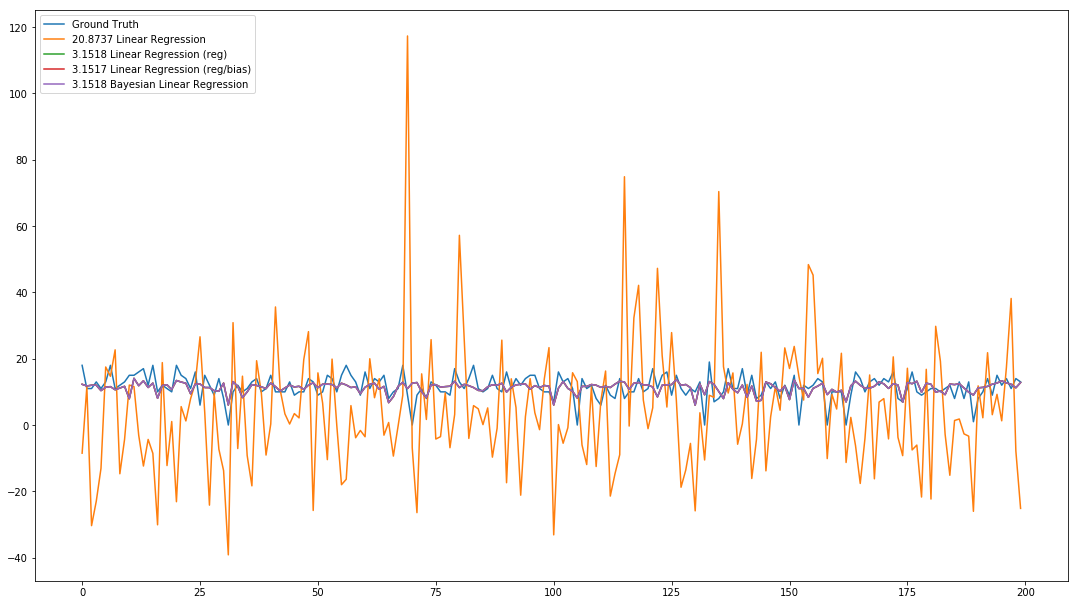

In [34]:
plt.plot(y_test_actual, label = 'Ground Truth')
plt.plot(y_no_bias, label = '20.8737 Linear Regression')
plt.plot(y_reg_no_bias, label = '3.1518 Linear Regression (reg)')
plt.plot(y_reg_bias, label = '3.1517 Linear Regression (reg/bias)')
plt.plot(y_bayesian, label = '3.1518 Bayesian Linear Regression')
#plt.show()

plt.legend(loc='upper left')

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

#fig.savefig('test2png.png', dpi=100)

# 2) Classification a)

In this second section, I have created an extra feature (**G3_label**) that is based on the value of the previous target feature **G3**. In this case, if G3 is greater or equal to 10, G3_label = 1, otherwise G3_label = 0. <br> <br> **if** G3 >= 10, **G3_label = 1** <br> otherwise, **G3_label = 0**

In [35]:
## C L A S S I F I C A T I O N

#df['elderly'] = np.where(df['age']>=50, 'yes', 'no')
train_df['G3_label'] = np.where(train_df['G3']>=10, 1, 0)
test_df['G3_label'] = np.where(test_df['G3']>=10, 1, 0)

In [36]:
print(train_df[:3]) #800x63 (extra column G3_label is created)

      ID  age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
674  675   17     2     2           1          1         0       4         5   
233  234   18     1     1           2          2         1       1         1   
739  740   16     4     4           1          1         0       3         3   

     goout    ...     nursery_yes  higher_no  higher_yes  internet_no  \
674      3    ...               1          1           0            1   
233      1    ...               1          0           1            1   
739      2    ...               1          1           0            0   

     internet_yes  romantic_no  romantic_yes  cat_mat  cat_por  G3_label  
674             0            1             0        0        1         1  
233             0            1             0        1        0         0  
739             1            0             1        1        0         0  

[3 rows x 63 columns]


In this case, for **training**, the feature used is no longer G3, but **G3_label** instead:

In [37]:
# The testing X used previously continues being the same here [800x20]. G3 is not present nor G3_label does.
# However, we should include both regularization and bias, therefore we would use the matrix X_bias [800x21] (also X_biasT)

# The y used correspond to G3_label

y = train_df.iloc[:,62:63].values #G3_label column (not normalized) [800x1]
len(y[0]) # y was renamed

# X_test_bias is the same as before [200x21]
#print(y)

1

For obtaining the weights, the **Identity matrix I** is 21x21 (add additional 1x1 due to the bias term). <br> **λ = 1.0**

In [38]:
# Apply the equation        y_train = weights * X_train + bias

product_clas = np.dot(X_biasT,X_bias)
ident_clas = np.identity(21)

suma_clas = np.add(product_clas,ident_clas)      #      (XT x X) + lambda*I               [21x800]x[800x21] = [21x21]
inv_clas = np.linalg.inv(suma_clas)              #      (XT x X + lambda*I)^-1                                [21x21]
product1_clas = np.dot(inv_clas,X_biasT)         #      (XT x X + lambda*I)^-1 (XT)        [21x21]x[21x800] = [21x800]
weights_clas = np.dot(product1_clas,y)           #      (XT x X + lambda*I)^-1 (XT) (y)    [21x800]x[800x1] = [21x1]
print(weights_clas)

[[ 0.31771678]
 [-0.01991662]
 [ 0.07370301]
 [-0.57676266]
 [ 0.09310178]
 [ 0.01611168]
 [-0.0907174 ]
 [-0.07932978]
 [ 0.03433995]
 [-0.01846475]
 [-0.22978953]
 [ 0.20515985]
 [ 0.11255693]
 [ 0.16116493]
 [ 0.15655184]
 [ 0.13342126]
 [ 0.18429551]
 [ 0.00511374]
 [-0.13329837]
 [-0.0160102 ]
 [ 0.01697763]]


Before moving forward, y_test_actual corresponds to the real values of **G3_label** in the testing dataframe, which will be used later on to evaluate the performance and accuracy of our model.

In [39]:
# update y_test_actual from G3 column to G3_label column (the binary column we created before)

y_test_actual = test_df.iloc[:,62:63].values #G3 column
len(y_test_actual[0])

1

In [40]:
rmse(X_test_bias,y_test_actual,weights_clas.T) # apartado 2a)

0.377899469331469

**Classification Prediction of the Linear Regression Model**, before applying the different **THRESHOLD** values:

In [41]:
# Prediction for classification
# Regularized Linear Regression with bias            [weights_clas]      21x1
y_clas = np.dot(X_test_bias,weights_clas)
#print(y_clas)

**Classification Prediction of the Linear Regression Model**, after applying the different **THRESHOLD** values:
<br> **0.1**
<br> **0.5**
<br> **0.9**

In [42]:
y_clas_01 = np.where(y_clas>=0.1, 1, 0)
y_clas_05 = np.where(y_clas>=0.5, 1, 0)
y_clas_09 = np.where(y_clas>=0.9, 1, 0)
#print(y_clas_09)

# 2) Classification b)

**Logistic Regression** model is applied now. After the weights are calculated (by using **Gradient Descent**), prediction is made. Then, the same threshold as in the previous case are applied:
<br> **0.1**
<br> **0.5**
<br> **0.9**

**GRADIENT DESCENT ALGORITHM**

Cost (h0(x),y) = {
<br> **-log(h0(x))** if y = 1,
<br> **-log(1-h0(x))** if y = 0
<br> }

$$J(\Theta ) = -\frac{1}{m}\cdot [ \sum_{i=1}^{m}y_{i}\cdot log h_{0}(x_{i})+(1-y_{i})log(1-h_{0}(x_{i}))]$$

So, if we want to minimize the cost function as a function ϴ, we can repeatedly update each parameter as for the gradient descent such as:

$$\Theta _{j}:=\Theta _{j}-\frac{\alpha }{m}\sum_{i=1}^{m}(h_{0}(x_{i})-y_{i})x_{ij}$$

In [43]:
# 2b) Predict G3_label based on the features previously used, by using Logistic Regression.
# Use regularization (lambda=1) and bias term.
# Use different thresholds for prediction, 0.1, 0.5, 0.9

# Training
# Same X is used [800x20]
# y is used [800x1], G3_label
len(y)

800

Before moving forward to the model, let us first have a better understanding of the data we are dealing with. I want to know, from the training dataset, how many **G3_label** records correspond to **True** and how many of them correspond to **False**. Let us plot a bar chart, too.

In [44]:
count_0 = 0
count_1 = 0
for i in range (0, len(y)):
    if y[i] == 0:
        count_0 = count_0 + 1
    elif y[i] == 1:
        count_1 += 1

In [45]:
df = {'values': ['0','1'], 'counts': [count_0, count_1]}
df_y = pd.DataFrame(data=df)
print(df_y)

  values  counts
0      0     182
1      1     618


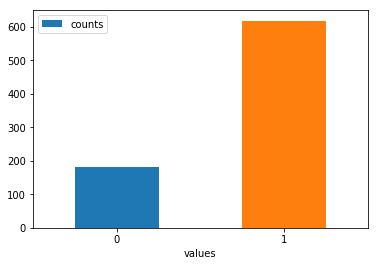

In [46]:
df_y.plot.bar(x='values', y='counts', rot=0) # real G3_label

In [47]:
# hypothesis (prediction)
#                                      1
#                            h0 = ------------
#                                 1 + e^(-wT*X)

# Gradient descent

# 1- For making the prediction y = h0, we need weights (theta) and X_test
# weights are obtained through gradient descent, updating theta (w):
#                                                                    w = w - alpha* sum (hw(x) - y)*X       (for i = 0 to n)


θ correspond to the weights of the Logistic Linear Regression. I have chosen to initialize them to **zero**.

In [48]:
theta = np.zeros((X_bias.shape[1], 1)) # length of 21 due to bias term

**Sigmoid function** is created to map any real value between 0 and 1:

In [49]:
# hypothesis (prediction) --> sigmoid function
#                                      1
#                            hθ = ------------
#                                 1 + e^(-θT*X)

# θ [21x1] (because includes bias term)
# θT [1x21]
# X_bias [800x21]


def sigmoid(theta,x):
    # Activation function used to map any real value between 0 and 1
    exponent = np.dot(x,theta)
    return 1 / (1 + np.exp(-exponent))

In [50]:
# hθ (hypothesis, prediction) must be a matrix of [800x1] = [800x21][21x1]
#                                                   hθ    =  X_bias   θ

len(sigmoid(theta,X_bias)) # prediction == [800x1]

800

**Gradient Descent** function is created to evaluate the error and update the values of θ for the specified number of iterations:

In [51]:
#gradient descent

# alpha = learning rate
# iters = number of iterations

def gradientDescent(X,y,theta,iters,alpha):
    ratio = alpha/y.shape[0]
    for i in range(iters):
        theta = theta - (ratio * (X.T @ (sigmoid(theta,X) - y)))
    
    return theta

Weights from **Logistic Regression** are obtained as follows:

In [52]:
alpha = 0.1
iters = 800
weights_logr = gradientDescent(X_bias,y,theta,iters,alpha)
print(weights_logr)

[[ 0.44820538]
 [-0.28974886]
 [ 0.5547679 ]
 [-1.59433185]
 [ 0.49438836]
 [ 0.00997647]
 [-0.26928274]
 [-0.25291773]
 [-0.16186624]
 [-0.01411598]
 [-0.28149097]
 [ 0.48722251]
 [-0.03901714]
 [ 0.24750223]
 [ 0.20070315]
 [ 0.05136838]
 [ 0.39683699]
 [-0.01600618]
 [-0.70668936]
 [-0.10974106]
 [ 0.25147143]]


In [53]:
len(weights_logr)

21

Now that the weights are known, let us:
<br> <br> **Predict** the values of G3_label (**no threshold**)
<br> **Apply 0.1, 0.5, 0.9 threholds** to the prediction.

In [54]:
# Prediction
prediction_logistic = sigmoid(weights_logr,X_test_bias)

In [55]:
#print(prediction_logistic)
y_logr_01 = np.where(prediction_logistic>=0.1, 1, 0)
y_logr_05 = np.where(prediction_logistic>=0.5, 1, 0)
y_logr_09 = np.where(prediction_logistic>=0.9, 1, 0)

The following block of code intends to **count**:
<br> <br> Total number of positives/negatives
<br> True positives
<br> True negatives
<br> False positives
<br> False negatives
<br> (for all thresholds of **Linear Regression** and **Logistic Regression**)
<br> <br> With all this information, plotting the **confusion matrices** will be a pretty easy task.

In [56]:
contador_y_clas_01 = 0     # counter of correct guesses (TP + TN)
contador_y_clas_05 = 0
contador_y_clas_09 = 0
contador_y_logr_01 = 0
contador_y_logr_05 = 0
contador_y_logr_09 = 0
count_y_actual_true = 0

# --------------------------- For confusion matrix --------------

truepos_clas_01 = 0
trueneg_clas_01 = 0
falsepos_clas_01 = 0
falseneg_clas_01 = 0

truepos_clas_05 = 0
trueneg_clas_05 = 0
falsepos_clas_05 = 0
falseneg_clas_05 = 0

truepos_clas_09 = 0
trueneg_clas_09 = 0
falsepos_clas_09 = 0
falseneg_clas_09 = 0

truepos_logr_01 = 0
trueneg_logr_01 = 0
falsepos_logr_01 = 0
falseneg_logr_01 = 0

truepos_logr_05 = 0
trueneg_logr_05 = 0
falsepos_logr_05 = 0
falseneg_logr_05 = 0

truepos_logr_09 = 0
trueneg_logr_09 = 0
falsepos_logr_09 = 0
falseneg_logr_09 = 0

# ----------------------------------------------------------------

for i in range (0,len(y_test_actual)):       # Correct guesses:
    
# -------------------- accuracy ----------------------------------

    if y_clas_01[i] == y_test_actual[i]:
        contador_y_clas_01 += 1                 #158/200
    if y_clas_05[i] == y_test_actual[i]:
        contador_y_clas_05 += 1                 #164/200
    if y_clas_09[i] == y_test_actual[i]:
        contador_y_clas_09 += 1                 # 66/200
    if y_logr_01[i] == y_test_actual[i]:
        contador_y_logr_01 += 1                 #158/200
    if y_logr_05[i] == y_test_actual[i]:
        contador_y_logr_05 += 1                 #158/200
    if y_logr_09[i] == y_test_actual[i]:
        contador_y_logr_09 += 1                 # 42/200
        
# ------------- number of real positives (real negatives = total - real positives) --------------------

    if y_test_actual[i] == 1:
        count_y_actual_true += 1             # REAL VALUES ARE: 158 true 42 false (accuracy 200/200)
        
# ----------------- for confusion matrix: true positives/negatives, false pos/neg ---------------------

    if y_clas_01[i] == y_test_actual[i] == 1:      # true positives         LINEAR REGRESSION CLASSIFICATION 0.1
        truepos_clas_01 += 1
    if y_clas_01[i] == y_test_actual[i] == 0:      # true negatives
        trueneg_clas_01 += 1
    if y_clas_01[i] == 1 and y_test_actual[i] == 0: # false positives
        falsepos_clas_01 += 1
    if y_clas_05[i] == 0 and y_test_actual[i] == 1: # false negatives
        falseneg_clas_01 += 1
        
    if y_clas_05[i] == y_test_actual[i] == 1:      # true positives         LINEAR REGRESSION CLASSIFICATION 0.5
        truepos_clas_05 += 1
    if y_clas_05[i] == y_test_actual[i] == 0:      # true negatives
        trueneg_clas_05 += 1
    if y_clas_05[i] == 1 and y_test_actual[i] == 0: # false positives
        falsepos_clas_05 += 1
    if y_clas_05[i] == 0 and y_test_actual[i] == 1: # false negatives
        falseneg_clas_05 += 1
        
    if y_clas_09[i] == y_test_actual[i] == 1:      # true positives         LINEAR REGRESSION CLASSIFICATION 0.9
        truepos_clas_09 += 1
    if y_clas_09[i] == y_test_actual[i] == 0:      # true negatives
        trueneg_clas_09 += 1
    if y_clas_09[i] == 1 and y_test_actual[i] == 0: # false positives
        falsepos_clas_09 += 1
    if y_clas_09[i] == 0 and y_test_actual[i] == 1: # false negatives
        falseneg_clas_09 += 1
    
    if y_logr_01[i] == y_test_actual[i] == 1:       # true positives        LOGISTIC REGRESSION 0.1
        truepos_logr_01 += 1
    if y_logr_01[i] == y_test_actual[i] == 0:       # true negatives
        trueneg_logr_01 += 1
    if y_logr_01[i] == 1 and y_test_actual[i] == 0: # false positives
        falsepos_logr_01 += 1
    if y_logr_01[i] == 0 and y_test_actual[i] == 1: # false negatives
        falseneg_logr_01 += 1
        
    if y_logr_05[i] == y_test_actual[i] == 1:       # true positives        LOGISTIC REGRESSION 0.5
        truepos_logr_05 += 1
    if y_logr_05[i] == y_test_actual[i] == 0:       # true negatives
        trueneg_logr_05 += 1
    if y_logr_05[i] == 1 and y_test_actual[i] == 0: # false positives
        falsepos_logr_05 += 1
    if y_logr_05[i] == 0 and y_test_actual[i] == 1: # false negatives
        falseneg_logr_05 += 1
        
    if y_logr_09[i] == y_test_actual[i] == 1:       # true positives        LOGISTIC REGRESSION 0.9
        truepos_logr_09 += 1
    if y_logr_05[i] == y_test_actual[i] == 0:       # true negatives
        trueneg_logr_09 += 1
    if y_logr_09[i] == 1 and y_test_actual[i] == 0: # false positives
        falsepos_logr_09 += 1
    if y_logr_09[i] == 0 and y_test_actual[i] == 1: # false negatives
        falseneg_logr_09 += 1

Record of **ACCURACIES**:

In [57]:
# Accuracy of each model (Linear vs Logistic Regression) with different threshold values


#                                      TP + TN
#                ACCURACY  =  ---------------------------
#                                 TP + TN + FP + FN

tot = len(y_test_actual)
acc_clas_01 = (truepos_clas_01+trueneg_clas_01)/(truepos_clas_01+trueneg_clas_01+falsepos_clas_01+falseneg_clas_01)
acc_clas_05 = (truepos_clas_05+trueneg_clas_05)/(truepos_clas_05+trueneg_clas_05+falsepos_clas_05+falseneg_clas_05)
acc_clas_09 = (truepos_clas_09+trueneg_clas_09)/(truepos_clas_09+trueneg_clas_09+falsepos_clas_09+falseneg_clas_09)
acc_logr_01 = (truepos_logr_01+trueneg_logr_01)/(truepos_logr_01+trueneg_logr_01+falsepos_logr_01+falseneg_logr_01)
acc_logr_05 = (truepos_logr_05+trueneg_logr_05)/(truepos_logr_05+trueneg_logr_05+falsepos_logr_05+falseneg_logr_05)
acc_logr_09 = (truepos_logr_09+trueneg_logr_09)/(truepos_logr_09+trueneg_logr_09+falsepos_logr_09+falseneg_logr_09)

acc_clas_01

0.7669902912621359

Record of **PRECISIONS**:

In [58]:
# Precision of each model (Linear vs Logistic Regression) with different threshold values


#                                    TP
#                PRECISION  =  ---------------
#                                 TP + FP

prec_clas_01 = (truepos_clas_01)/(truepos_clas_01+falsepos_clas_01)
prec_clas_05 = (truepos_clas_05)/(truepos_clas_05+falsepos_clas_05)
prec_clas_09 = (truepos_clas_09)/(truepos_clas_09+falsepos_clas_09)
prec_logr_01 = (truepos_logr_01)/(truepos_logr_01+falsepos_logr_01)
prec_logr_05 = (truepos_logr_05)/(truepos_logr_05+falsepos_logr_05)
prec_logr_09 = (truepos_logr_09)/(truepos_logr_09+falsepos_logr_09)

Dataframe for CONFUSION MATRIX OF **CLASSIFICATION BY LINEAR REGRESSION** (threshold = 0.5, 0.9)

In [59]:
# CONFUSION MATRIX OF CLASSIFICATION BY LINEAR REGRESSION (threshold = 0.5, 0.9)
df_05 = {'predicted true (1)': [falsepos_clas_05, truepos_clas_05], 'predicted false (0)': [trueneg_clas_05,falseneg_clas_05]}
df_05 = pd.DataFrame(data=df_05, index = ['false = 0','true = 1'])
print(df_05)

df_09 = {'predicted true (1)': [falsepos_clas_09, truepos_clas_09], 'predicted false (0)': [trueneg_clas_09,falseneg_clas_09]}
df_09 = pd.DataFrame(data=df_09, index = ['false = 0','true = 1'])
print(df_09)

           predicted true (1)  predicted false (0)
false = 0                  30                   12
true = 1                  152                    6
           predicted true (1)  predicted false (0)
false = 0                   2                   40
true = 1                   26                  132


Dataframe for CONFUSION MATRIX OF **CLASSIFICATION BY LOGISTIC REGRESSION** (threshold = 0.5, 0.9)

In [60]:
# CONFUSION MATRIX OF CLASSIFICATION BY LOGISTIC REGRESSION (threshold = 0.5, 0.9)
df_05_log = {'predicted true (1)': [falsepos_logr_05, truepos_logr_05], 'predicted false (0)': [trueneg_logr_05,falseneg_logr_05]}
df_05_log = pd.DataFrame(data=df_05_log, index = ['false = 0','true = 1'])
print(df_05_log)

df_09_log = {'predicted true (1)': [falsepos_logr_09, truepos_logr_09], 'predicted false (0)': [trueneg_logr_09,falseneg_logr_09]}
df_09_log = pd.DataFrame(data=df_09_log, index = ['false = 0','true = 1'])
print(df_09_log)

           predicted true (1)  predicted false (0)
false = 0                  33                    9
true = 1                  155                    3
           predicted true (1)  predicted false (0)
false = 0                   0                    9
true = 1                   10                  148


In [61]:
type(df_05)

pandas.core.frame.DataFrame

# 2) Classification c)

Confusion Matrix - **Linear Regression** - Threshold = 0.5:

Accuracy: 
0.82


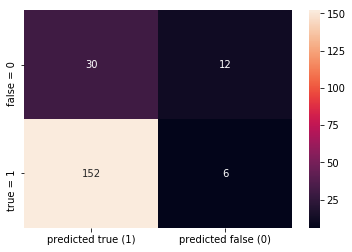

In [62]:
ax = sns.heatmap(df_05, annot=True, fmt="d")
print('Accuracy: ')
print(acc_clas_05)

Confusion Matrix - **Logistic Regression** - Threshold = 0.5:

Accuracy: 
0.82


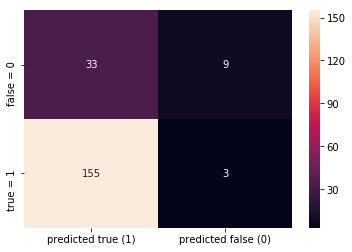

In [63]:
ax = sns.heatmap(df_05_log, annot=True, fmt="d")
print('Accuracy: ')
print(acc_logr_05)

# 2) Classification d)

Confusion Matrix - **Linear Regression** - Threshold = 0.9:

Accuracy: 
0.33


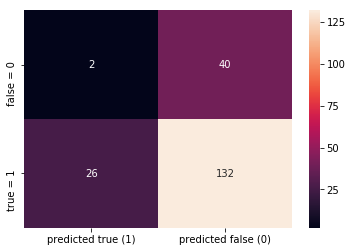

In [64]:
ax = sns.heatmap(df_09, annot=True, fmt="d")
print('Accuracy: ')
print(acc_clas_09)

Confusion Matrix - **Logistic Regression** - Threshold = 0.9:

Accuracy: 
0.11377245508982035


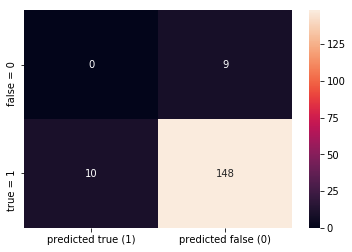

In [65]:
ax = sns.heatmap(df_09_log, annot=True, fmt="d")
print('Accuracy: ')
print(acc_logr_09)

# 2) Classification e)

Let us first create a dataframe to summarize all the **precisions** and **accuracies** of the 2 models for each of the 3 threshold values:

In [66]:
df_prec_acc = {'Linear Regression': [acc_clas_01, acc_clas_05, acc_clas_09,prec_clas_01, prec_clas_05, prec_clas_09], 'Logistic Regression': [acc_logr_01, acc_logr_05, acc_logr_09, prec_logr_01, prec_logr_05, prec_logr_09]}
df_prec_acc = pd.DataFrame(data = df_prec_acc, index = ['0.1 Accuracy', '0.5 Accuracy', '0.9 Accuracy','0.1 Precision', '0.5 Precision', '0.9 Precision'])
df_prec_acc

,Linear Regression,Logistic Regression
0.1 Accuracy,0.766990,0.790000
0.5 Accuracy,0.820000,0.820000
0.9 Accuracy,0.330000,0.113772
0.1 Precision,0.790000,0.790000
0.5 Precision,0.835165,0.824468
0.9 Precision,0.928571,1.000000


**The low accuracy issue**: FROM *0.5* TO *0.9* THRESHOLD.

<br> <br> Let us look at the following image, it is the **sigmoid** function. This function maps any real value between 0 and 1.
<br> But, **what is the significance of having a 0.5 threshold?**
<br> Well, it basically means that the prediction will be mapped to 1 whenever the output is equal or greater that 0.5, and it will be mapped to 0 whenever this output is lower than 0.5, such as:

<br> **y = 1**  if  hθ (x) >= 0.5
<br> **y = 0**  if  hθ (x) < 0.5

![title](images/sigmoid1.png)

According to the image of the ***Sigmoid Function***, when the threshold is 0.5, the mapping is as likely as going towards 1 as towards 0 (if we neglect the fact that, in the case of being equal to 0.5, the mapping will be done upwards). In other words, the probability that the prediction goes to either 1 or 0 is the same.
<br> However, when we change the threshold to 0.9, this probability changes dramatically, making much more difficult the output to be high enough (> 0.9) to be mapped as true.
<br> In conclusion, when the threshold is changed from a medium value to an extreme one, the chances of mapping close to this extreme are lower, changing the behaviour of our prediction and making important variations in the output. Therefore, the once-mapped outputs (with medium value of the threshold, such as 0.5) would in this case be mapped in the opposite direction, increasing the error and **decreasing the accuracy** of the model.

# 3) Hidden Test Set a)

In [67]:
len(weights_reg_bias) # [21x1] weights that will be used

21

In [68]:
# Read the whole dataset train.csv
whole_test = pd.read_csv("test_no_G3.csv")
#len(whole_test)
whole_test = pd.get_dummies(whole_test)
#print(whole_test[0:3])

In [69]:
X_1test = whole_test.loc[:, whole_test.columns.intersection([
 'school_GP',
 'school_MS',
 'sex_F',
 'sex_M',
 'age',
 'famsize_GT3',
 'famsize_LE3',                                            
 'studytime',
 'failures',
 'activities_no',
 #'activities_yes',
 'higher_no',
 #'higher_yes',
 'internet_no',
 #'internet_yes',
 'romantic_no',
 #'romantic_yes',
 'famrel',                                                  
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences'])]
X_1test = ((X_1test-X_1test.min())/(X_1test.max()-X_1test.min())) #normalization

ones = np.ones([X_1test.shape[0],1])
ones = ones*1 # best result, even if mean of y column is 11.29125
len(ones[0])
X_1test = np.concatenate((ones,X_1test),axis=1)
len(X_1test[0]) # [44x21]

21

In [70]:
# PREDICTION USING 1d) Linear Regression w/ regularization + bias
G3_prediction_1d = np.dot(X_1test,weights_reg_bias) # [44x1] = [44x21]x[21x1]
#print(G3_prediction_1d)

Before saving as a txt file our prediction, let us build a dataframe with proper indices.

In [71]:
test1 = pd.DataFrame(data = G3_prediction_1d)
test1.index = pd.RangeIndex(start=1001, stop=1045, step=1)
test1['index'] = test1.index
test1 = test1.reindex(['index',0], axis=1)
print(test1[0:3])

      index          0
1001   1001  12.029546
1002   1002  11.759240
1003   1003  11.088148


In [72]:
np.savetxt('107065431_1.txt', test1.values, fmt='%d')

# 3) Hidden Test Set b)

In [73]:
len(weights_logr) # [21x1] weights that will be used

21

In [74]:
# PREDICTION USING 2b) Logistic Regression
G3_label_prediction_2b = np.dot(X_1test,weights_logr) # [44x1] = [44x21]x[21x1]
G3_label_prediction_2b = np.where(G3_label_prediction_2b>=0.5, 1, 0)
#print(G3_label_prediction_2b)
test2 = pd.DataFrame(data = G3_label_prediction_2b)
test2.index = pd.RangeIndex(start=1001, stop=1045, step=1)
test2['index'] = test2.index
test2 = test2.reindex(['index',0], axis=1)
print(test2[0:3])

      index  0
1001   1001  1
1002   1002  1
1003   1003  1


In [75]:
np.savetxt('107065431_2.txt', test2.values, fmt='%d')